In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('../../notes and data/Mall_Customers.csv')
df = pd.get_dummies(df, drop_first=True).astype(int)
x = df.drop(columns=['CustomerID'])
k = 5  # Example number of clusters
centroids = x.sample(n=k).to_numpy()  
# Randomly selects k rows from the data as centroids
initial_centroids = centroids.copy()
print(centroids)
x = np.array(x)

print(df)

[[32 76 87  0]
 [35 21 35  0]
 [31 40 42  0]
 [68 63 43  1]
 [35 24 35  1]]
     CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0             1   19                  15                      39            1
1             2   21                  15                      81            1
2             3   20                  16                       6            0
3             4   23                  16                      77            0
4             5   31                  17                      40            0
..          ...  ...                 ...                     ...          ...
195         196   35                 120                      79            0
196         197   45                 126                      28            0
197         198   32                 126                      74            1
198         199   32                 137                      18            1
199         200   30                 137                      83  

In [2]:
def centroidIteration(x, K):
    for n in range(100):  # Maximum iterations
        cluster_assignments = []  # Store the nearest centroid for each point
        new_centroids = K.copy()  # Copy the centroids to compare later
        # Step 1: Assign each point to the nearest centroid
        for i in range(len(x)):  # Loop over each data point
            diff = []  # Reset list for distances from x[i] to each centroid
            for j in range(len(K)):  # Loop over each centroid
                # Calculate squared distance across all features for x[i] and K[j]
                dist = np.sum((x[i] - K[j])**2)  # Sum of squared differences across features
                diff.append(dist)  # Append the distance for this centroid
            
            # Find the closest centroid for x[i]
            min_index = diff.index(min(diff))
            cluster_assignments.append(min_index)  # Store the assignment
        
        # Step 2: Update centroids based on the mean of assigned points
        for q in range(len(K)):  # Loop over each centroid
            assignedPts = [x[i] for i in range(len(x)) if cluster_assignments[i] == q]
            if assignedPts:  # Ensure there are points assigned to this centroid
                K[q] = np.mean(assignedPts, axis=0)  # Update centroid to the mean of assigned points
            else:
                # If no points are assigned, reuse the initial centroid
                K[q] = initial_centroids[q]  # Keep the original centroid
        # Check for convergence: If centroids haven't changed, stop early
        if np.allclose(new_centroids, K, atol=1e-4):  # Compare old and new centroids
            print(f"Converged after {n+1} iterations.")
            break
            
    return cluster_assignments, K 


# Run the K-means algorithm


In [3]:
cluster_assignments, final_centroids = centroidIteration(x, centroids)
print("Final Centroids:\n", final_centroids)
print(centroids)
print("\nCluster Assignments:\n", cluster_assignments)

Converged after 12 iterations.
Final Centroids:
 [[32 86 82  0]
 [44 25 19  0]
 [24 41 63  0]
 [40 87 18  0]
 [53 54 48  0]]
[[32 86 82  0]
 [44 25 19  0]
 [24 41 63  0]
 [40 87 18  0]
 [53 54 48  0]]

Cluster Assignments:
 [1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 4, 2, 4, 2, 1, 2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0]


In [4]:
# Calculate the distance of each point to its centroid
distances = np.linalg.norm(x - final_centroids[cluster_assignments], axis=1)

print(distances)
# Define a threshold to identify outliers (points that are far from their centroids)
threshold = np.percentile(distances, 95)  # Points with distance > 95th percentile are outliers

# Identify outliers
outliers = distances > threshold

# Plotting the results
plt.figure(figsize=(8, 6))

# Plot the data points
plt.scatter(x[:, 0], x[:, 1], c=cluster_assignments, cmap='viridis', label='Data points')

# Highlight the outliers
plt.scatter(x[outliers, 0], x[outliers, 1], color='red', label='Outliers', edgecolors='black')

# Plot the final centroids
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], color='black', marker='X', s=200, label='Centroids')

# Labeling
plt.title('K-Means Clustering with Outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Output the indices of the outliers
print("Outlier indices:", np.where(outliers)[0])

[33.55592347 31.78049716 28.74021573 28.67054237 25.96150997 27.36786437
 17.29161647 38.61346915 26.32489316 24.51530134 24.31049156 43.60045871
 15.39480432 25.23885893 10.53565375 26.4952826  18.78829423 20.63976744
 13.         40.86563348 18.41195264 19.77371993 14.14213562 20.14944168
 11.5758369  23.57965225 13.37908816 17.17556404 13.26649916 26.85144316
 22.5166605  15.16575089 19.26136028 30.69201851 10.67707825 19.92485885
  9.43398113 13.60147051 16.03121954 13.26649916 23.85372088 29.17190429
 19.87460691  7.54983444 17.3781472   2.82842712 15.93737745 16.30950643
 21.61018278 22.15851981 13.26649916  9.59166305 11.5758369  17.3781472
 11.78982612 14.38749457 10.39230485 19.         13.34166406  8.30662386
 20.4450483  10.72380529 16.15549442 13.07669683 12.08304597 10.09950494
 11.83215957 16.15549442  9.53939201 19.20937271 19.07878403  9.8488578
  8.1240384  11.35781669  6.164414   15.96871942  9.43398113 13.03840481
 17.05872211  7.21110255  5.09901951 16.58312395 15.6

NameError: name 'plt' is not defined

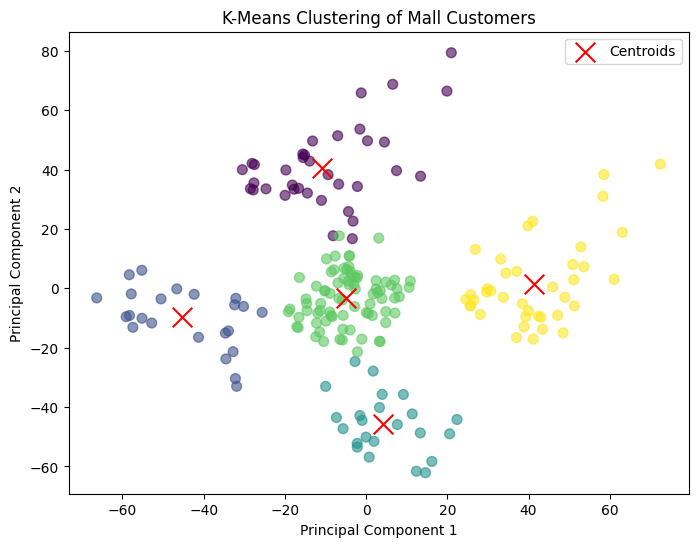

In [96]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1: Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)  # Transform the original data into 2D

# Step 2: Create the plot
plt.figure(figsize=(8, 6))

# Step 3: Plot the data points
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=cluster_assignments, cmap='viridis', marker='o', s=50, alpha=0.6)

# Step 4: Plot the centroids
centroids_pca = pca.transform(final_centroids)  # Transform centroids to the 2D space
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='x', s=200, label='Centroids')

# Step 5: Add labels and title
plt.title('K-Means Clustering of Mall Customers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

### first step in clustering is to initialize cluster centroid randomly

Random Selection from Data:

1. Since centroids represent the center of each cluster, we can start by choosing some initial points randomly from the dataset itself.

2. Let’s say you want to create 
𝑘
k clusters. Randomly select 
𝑘
k unique data points as your initial centroids.

Alternative: Random Values Within Feature Range:

1. This method involves setting random values within the range of each feature.
2. For each feature (e.g., age, income, spending score), find its minimum and maximum values.
3. For each centroid, generate random values within those min-max ranges for every feature.

In [47]:
centroids1 = np.array([
    [np.random.uniform(df['Age'].min(), df['Age'].max()),
     np.random.uniform(df['Annual Income (k$)'].min(), df['Annual Income (k$)'].max()),
     np.random.uniform(df['Spending Score (1-100)'].min(), df['Spending Score (1-100)'].max())]
    for _ in range(k)
])
print(centroids1)

[[ 58.05281735  86.95374516  82.01819632]
 [ 20.23357495  89.08104296  68.34633994]
 [ 41.14688486 120.51659932  35.57872293]]


### Step 2: Assigning Points to the Closest Centroid

d= 
(x 
i1
​
 −c 
j1
​
 ) 
2
 +(x 
i2
​
 −c 
j2
​
 ) 
2
 +⋯+(x 
in
​
 −c 
jn
​
 ) 
2
 
​


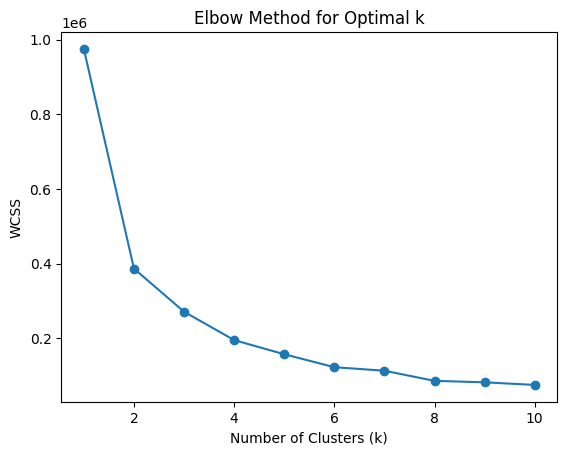

In [97]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS for the current k

# Plotting the Elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(x)
cluster_assignments1 = kmeans.labels_

# Get the final centroids
final_centroids1 = kmeans.cluster_centers_
print(cluster_assignments1,final_centroids1)

[2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0
 4 0 0 0 4 0 0 0 0 4 0 4 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1] [[ 46.21348315  47.71910112  41.79775281   0.38202247]
 [ 32.45454545 108.18181818  82.72727273   0.45454545]
 [ 24.68965517  29.5862069   73.65517241   0.48275862]
 [ 40.39473684  87.          18.63157895   0.52631579]
 [ 31.78787879  76.09090909  77.75757576   0.45454545]]


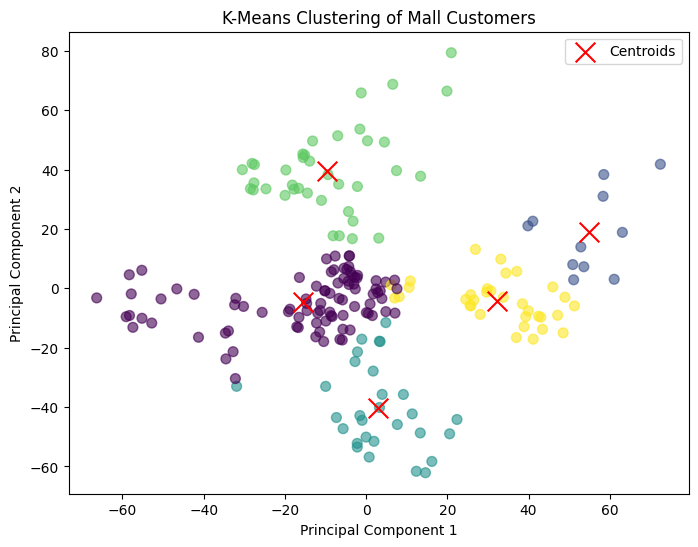

In [9]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1: Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)  # Transform the original data into 2D

# Step 2: Create the plot
plt.figure(figsize=(8, 6))

# Step 3: Plot the data points
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=cluster_assignments1, cmap='viridis', marker='o', s=50, alpha=0.6)

# Step 4: Plot the centroids
centroids_pca = pca.transform(final_centroids1)  # Transform centroids to the 2D space
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='x', s=200, label='Centroids')

# Step 5: Add labels and title
plt.title('K-Means Clustering of Mall Customers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()